In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

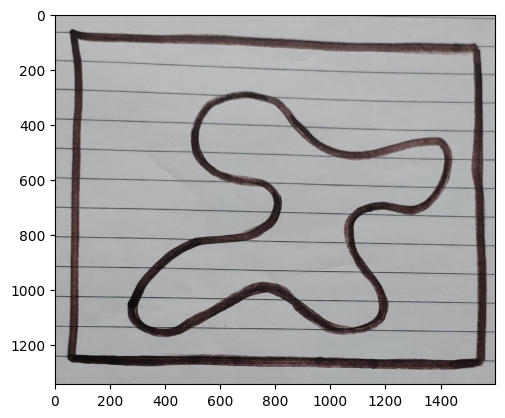

In [2]:
img = 'image_1.jpg'
image = cv.imread(img)

plt.imshow(image)
plt.show()

### To remove background lines/noise

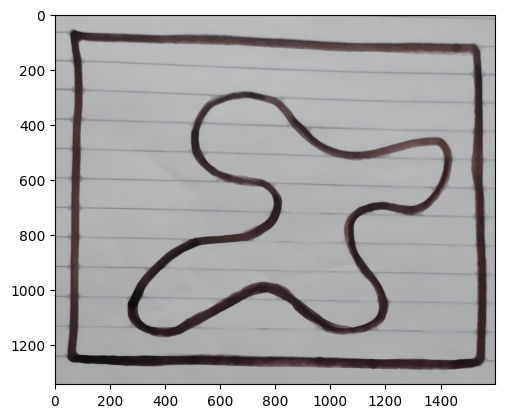

In [3]:
gray = cv.cvtColor(image, cv.COLOR_RGB2GRAY)
blur_med = cv.medianBlur(image,7)

A = 20  # set A as per requirement, this loop is to make the backgroud lines(if any) fade

for i in range(A):
    blur_med = cv.medianBlur(blur_med,7)

plt.imshow(blur_med)
plt.show()


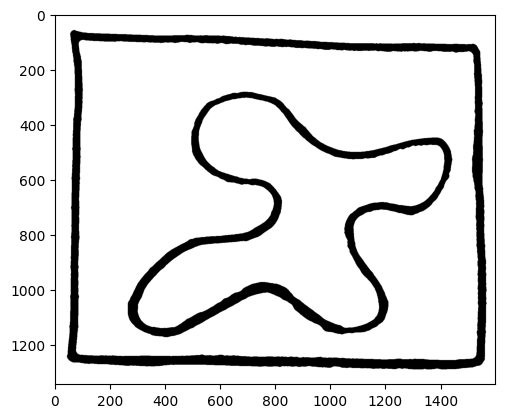

In [4]:
gray_1 = cv.cvtColor(blur_med, cv.COLOR_RGB2GRAY)

ret, th1 = cv.threshold(gray_1, 100, 150, cv.THRESH_BINARY) # change threshold values as per the marked path

plt.imshow(th1, cmap='gray')
plt.show()

### Smooth out the curve

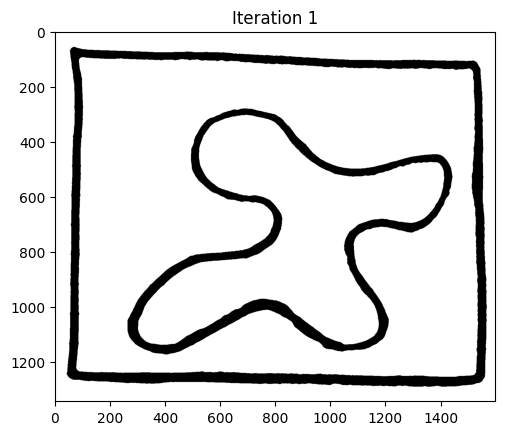

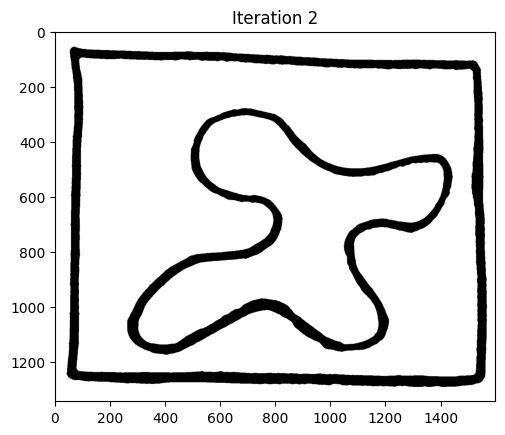

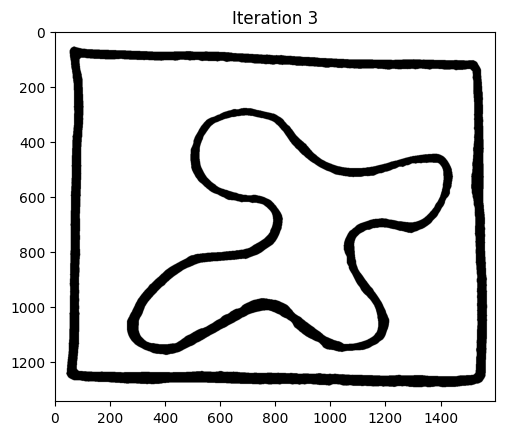

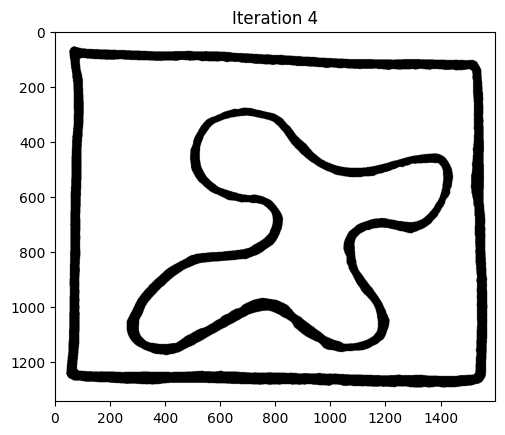

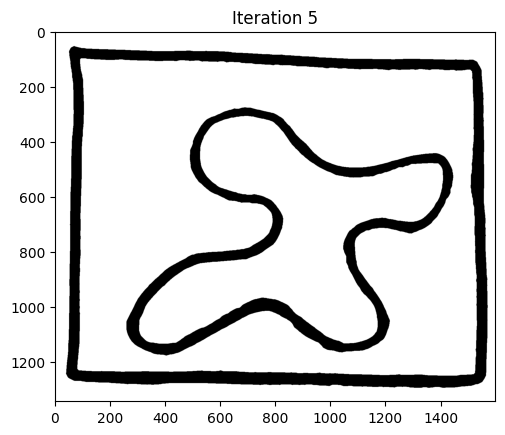

In [5]:

plt.ion()  

B = 5 #this loop is to smoothout the curve if there are any rugged lines left

for i in range(B):
    th1 = cv.blur(th1,(3,3),cv.BORDER_DEFAULT)
    ret, th1 = cv.threshold(th1, 100+(2*i), 150-(2*i), cv.THRESH_BINARY)
    
    plt.clf()  
    plt.imshow(th1, cmap='gray')
    plt.title(f'Iteration {i+1}')
    plt.pause(.5)  

plt.ioff() 
plt.show()  

##### This code block is to remove the outer bounding box(if drawn for prespective transformation)

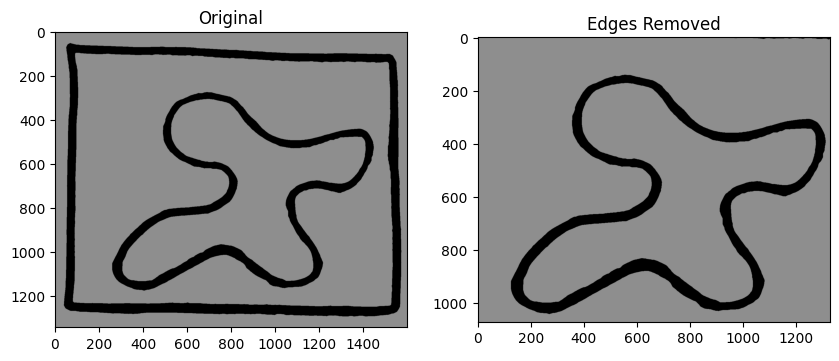

In [6]:
N = 135

cropped = th1[N:-N, N:-N]

plt.figure(figsize=(10,5))
plt.subplot(1,2,1), plt.imshow(cv.cvtColor(th1, cv.COLOR_BGR2RGB)), plt.title("Original")
plt.subplot(1,2,2), plt.imshow(cv.cvtColor(cropped, cv.COLOR_BGR2RGB)), plt.title("Edges Removed")
plt.show()

### Select and show the outermost contour i.e. our path

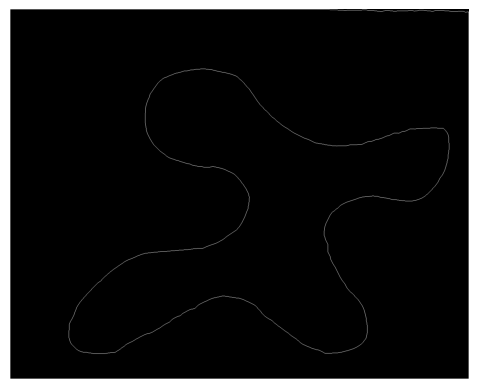

In [8]:
contours, hierarchy = cv.findContours(cropped, cv.RETR_CCOMP, cv.CHAIN_APPROX_NONE)

Path = np.zeros_like(cropped)

for i, h in enumerate(hierarchy[0]):
    if h[3] == -1:  
        cv.drawContours(Path, contours, i, 255, thickness=1)


plt.imshow(Path, cmap='gray')
plt.axis('off')
plt.show()

### Convert contour to (X,Y) coordinates

In [176]:
selected_contour = None


for i, h in enumerate(hierarchy[0]):
    if h[3] == -1:
        selected_contour = contours[i]
        break

points = [(pt[0][0], pt[0][1]) for pt in selected_contour] 

### Create CSV file out of coordinates extracted

In [177]:
import csv

with open('outer_path.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(['x', 'y'])
    writer.writerows(points)

### Create SVG file out of coordinates extracted

In [178]:
with open('outer_path.svg', 'w') as f:
    f.write('<svg xmlns="http://www.w3.org/2000/svg" version="1.1">\n')
    f.write('<polyline points="')
    f.write(' '.join([f'{x},{y}' for x, y in points]))
    f.write('" style="fill:none;stroke:black;stroke-width:1"/>\n')
    f.write('</svg>')